# Bank Data Science Challenge 

## In this notebook I will dig into EDA and Machine Learning Models to detect Fraud

#### I'm importing the libraries that will help me to analyze and explore the database.

In [1]:
#Data Manipulation
import pandas as pd
import numpy as np
# Start Python Imports
import math, time, random, datetime
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

# Machine learning
import scipy.stats as st
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
#Predictions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier


# Loading the data

Data is incorporated into jupyter notebook, I changed the name to df , data frame, to facilitate the exercise 

In [2]:
df = pd.read_csv('Stori_Data_Challenge_2021..csv')
df

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,8947,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
8947,8948,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,8949,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


After I load the data, I want to see what are the types of records I am dealing with 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

I have seen that many of the values are float and integers but also objects (datatime), which I'd try to change to a data format for ease using.
I change the type of data of the two columns to datatime instead of objects

In [4]:
df["activated_date"] = pd.to_datetime(df["activated_date"])
df["last_payment_date"] = pd.to_datetime(df["last_payment_date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        8950 non-null   int64         
 1   cust_id                           8950 non-null   object        
 2   activated_date                    8937 non-null   datetime64[ns]
 3   last_payment_date                 8941 non-null   datetime64[ns]
 4   balance                           8948 non-null   float64       
 5   balance_frequency                 8950 non-null   float64       
 6   purchases                         8950 non-null   float64       
 7   oneoff_purchases                  8950 non-null   float64       
 8   installments_purchases            8950 non-null   float64       
 9   cash_advance                      8838 non-null   float64       
 10  purchases_frequency               8950 non-null 

In [6]:
#removing any customer duplicates
duplicates = df['cust_id'].duplicated()
print(duplicates.value_counts())

False    8950
Name: cust_id, dtype: int64


Exploratory data analysis, here I'll check the quality of the data provided, missing values, etc. before proceding with a more rigorous analsis

In [7]:
df.describe()

,Unnamed: 0,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8950.000000,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000
mean,4475.500000,1564.612804,0.877271,1003.204834,592.437371,411.067645,978.980630,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2583.786788,2081.735635,0.236904,2136.634782,1659.887917,904.338115,2099.762588,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2238.250000,128.234272,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000
50%,4475.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,311.963409,0.000000,12.000000,0.000000
75%,6712.750000,2054.525476,1.000000,1110.130000,577.405000,468.637500,1115.395002,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.271126,0.142857,12.000000,0.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


#After we have seen a brief description of the data, I saw that in the column "minimum_payments" there are only 8629 values but we have 8950 objects, so we have 321 missing values!

Another insight is also the amount of dollars in the balance for each people, while even 75% has less than 3000 in their account I know the data is going to be skewed and with a lot of outliers!

In [8]:
number_of_missing_values = df.isnull().sum().sort_values(ascending=False)
number_of_missing_values

minimum_payments                    321
cash_advance                        112
activated_date                       13
last_payment_date                     9
balance                               2
credit_limit                          1
Unnamed: 0                            0
cash_advance_frequency                0
tenure                                0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cust_id                               0
purchases_frequency                   0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
fraud                                 0
dtype: int64

#Now, we want to minimize the number of missing values, so I want to know how deleting these values from my data would affect in my analysis


<AxesSubplot:>

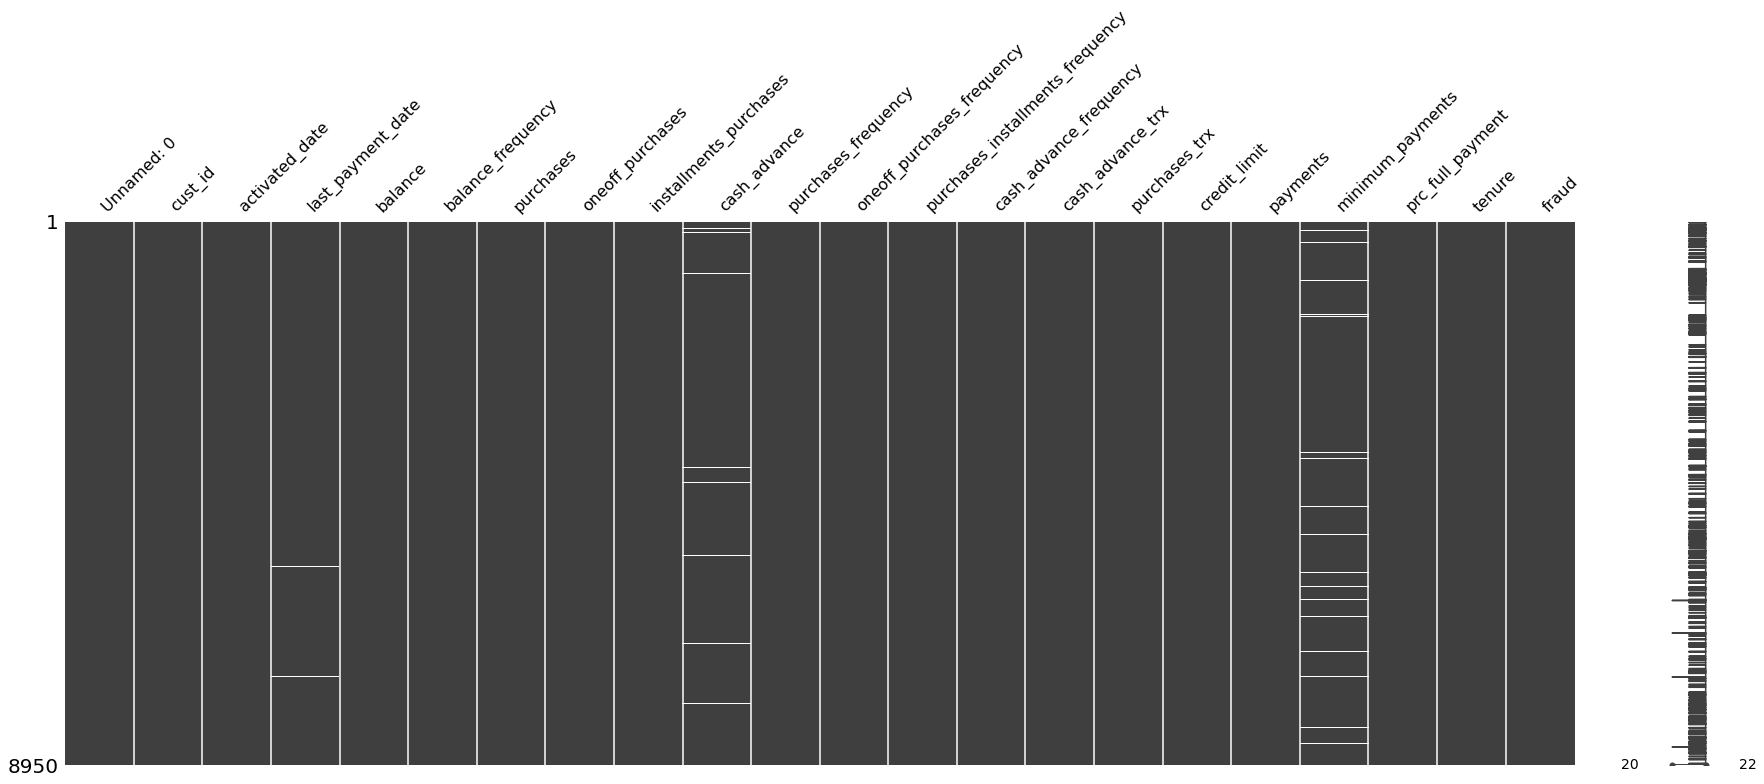

In [9]:

msno.matrix(df, figsize = (30,10))

# Question 1

In question 1 they asked me to get the balance of all the customers, so I just simply extract the balance from my data

In [10]:
#1 plotting an histogram of the balance of all the customer
#first I extracted the 
customer_balance = df['balance']
customer_balance


0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: balance, Length: 8950, dtype: float64

Then I do a simple visualization using matplot library to get a visual picture (just as asked)

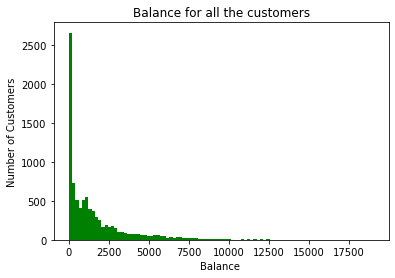

In [11]:
#histogram about the balance customer after extracting the information.
plt.hist(customer_balance, 94, color='green')
plt.title('Balance for all the customers') 
plt.xlabel('Balance ') 
plt.ylabel('Number of Customers') 
plt.show()

Well now I tried to use seaborn library to see how this data is visualized better

<AxesSubplot:xlabel='balance', ylabel='Count'>

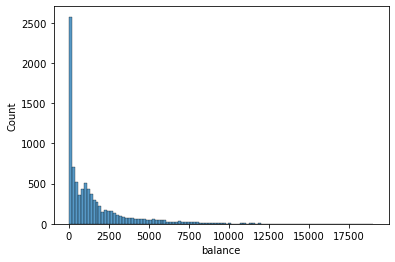

In [12]:
sns.histplot(customer_balance)

I noticed that there are a lot of outliers in the data that make my histogram skew right, so I decided to split my customer balance in two data sets.
those customers who have 3000 and less in their account and those who have balances above this value.

In [13]:
#histogram of customers that have less than $3000 in their account
cust_3000 = df[df['balance'] < 3000]
x = cust_3000['balance']
x

0         40.900749
2       2495.148862
3       1666.670542
4        817.714335
5       1809.828751
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: balance, Length: 7497, dtype: float64

In [14]:
print(np.mean(df['balance']))

1564.612803686078


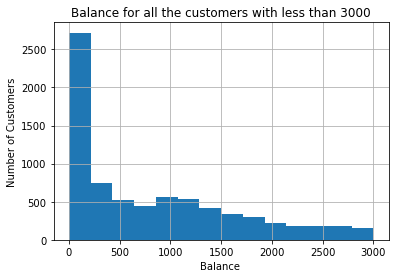

In [15]:
plt.hist(x, bins = 14)
plt.title('Balance for all the customers with less than 3000') 
plt.xlabel('Balance ') 
plt.ylabel('Number of Customers') 
plt.grid()
plt.show()

Even once we split the data with a group lower than 3000, the data is still skew to the right, and makes sense, 50% of the people have around 800 in their accounts!

Report mean and median balance grouped by year and month of activated_date
first we are changing our activated_date column format to year and month

In [16]:
df['activated_date'] = df['activated_date'].dt.strftime('%Y-%m')
df

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,C19186,2020-07,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,8947,C19187,2020-07,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
8947,8948,C19188,2020-07,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,8949,C19189,2020-07,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


I do a simple line of code to get the mean balance

In [17]:
balance_mean_by_year_and_month = df.groupby('activated_date').balance.mean()
balance_mean_by_year_and_month 

activated_date
2019-10    2482.234166
2019-11    1848.704323
2019-12    2018.788906
2020-01    1854.535889
2020-02    1747.350977
2020-03    1554.973023
2020-04    1483.183191
2020-05    1214.333732
2020-06     939.997996
2020-07     649.717622
Name: balance, dtype: float64

Just with the same analysis, I do get a median balance group by activated date

In [18]:
balance_median_by_year_and_month = df.groupby('activated_date').balance.median()
balance_median_by_year_and_month 

activated_date
2019-10    1524.409377
2019-11    1082.071173
2019-12    1162.588384
2020-01    1175.749847
2020-02     994.841733
2020-03     828.954823
2020-04     910.141912
2020-05     734.557681
2020-06     472.791862
2020-07     221.291290
Name: balance, dtype: float64

Here, I have the median with the activated_date by month and year!

# Question 2


In this exercise, I was asked to make a simple selection of data with specific values, for this I will just do a 
point by point exercise

First I selected the columns required

In [19]:
#Table of the people who activated their account and made their last payment during 2020
new_table = df[["cust_id","activated_date", "last_payment_date", "cash_advance", "credit_limit"]].reset_index()
new_table

,index,cust_id,activated_date,last_payment_date,cash_advance,credit_limit
0,0,C10001,2019-10,2020-09-09,0.000000,1000.0
1,1,C10002,2019-10,2020-07-04,6442.945483,7000.0
2,2,C10003,2019-10,2020-09-17,0.000000,7500.0
3,3,C10004,2019-10,2020-08-24,205.788017,7500.0
4,4,C10005,2019-10,2020-10-20,0.000000,1200.0
...,...,...,...,...,...,...
8945,8945,C19186,2020-07,2020-11-03,0.000000,1000.0
8946,8946,C19187,2020-07,2020-09-06,0.000000,1000.0
8947,8947,C19188,2020-07,2020-06-03,0.000000,1000.0
8948,8948,C19189,2020-07,2020-07-19,36.558778,500.0


I look in the type of variables given and how this would cause me a problem once I tried to filter my data with the range of values

In [20]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              8950 non-null   int64         
 1   cust_id            8950 non-null   object        
 2   activated_date     8937 non-null   object        
 3   last_payment_date  8941 non-null   datetime64[ns]
 4   cash_advance       8838 non-null   float64       
 5   credit_limit       8949 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 419.7+ KB


Here I noticed that my activated_date and last_payment_date are objects, when I can work with strings, I rather change
the type of data to a datetime so I can work more easily when getting the format

In [21]:
#changing the format of cust_id and activated_date for users in table
new_table['cust_id'] = new_table.cust_id.str[1:] #like I said, I could've done the same with the activated_date but not
new_table["activated_date"] = pd.to_datetime(new_table["activated_date"])
new_table["activated_date"] = new_table['activated_date'].dt.strftime('%Y-%m')

new_table

,index,cust_id,activated_date,last_payment_date,cash_advance,credit_limit
0,0,10001,2019-10,2020-09-09,0.000000,1000.0
1,1,10002,2019-10,2020-07-04,6442.945483,7000.0
2,2,10003,2019-10,2020-09-17,0.000000,7500.0
3,3,10004,2019-10,2020-08-24,205.788017,7500.0
4,4,10005,2019-10,2020-10-20,0.000000,1200.0
...,...,...,...,...,...,...
8945,8945,19186,2020-07,2020-11-03,0.000000,1000.0
8946,8946,19187,2020-07,2020-09-06,0.000000,1000.0
8947,8947,19188,2020-07,2020-06-03,0.000000,1000.0
8948,8948,19189,2020-07,2020-07-19,36.558778,500.0


Here, I'm just exploring the data to verify that I have the correct months

In [22]:
# exploring the data in activated_date to verify which months I need in the end of the exercise
new_table['activated_date'].value_counts()

2019-11    954
2020-07    943
2020-05    932
2020-03    928
2020-01    888
2020-04    882
2020-06    874
2019-12    867
2020-02    860
2019-10    809
Name: activated_date, dtype: int64

In [23]:
df["activated_date"] = pd.to_datetime(df["activated_date"])
df_time = df['activated_date'].dt.strftime('%Y-%m')
df_time.value_counts().sort_values(ascending=False)

2019-11    954
2020-07    943
2020-05    932
2020-03    928
2020-01    888
2020-04    882
2020-06    874
2019-12    867
2020-02    860
2019-10    809
Name: activated_date, dtype: int64

Well, now I just apply the first task asked, the ranges betweeen the payment_date and activated_date (during 2020)

In [24]:
#selecting the range of data
mask1 = (new_table['activated_date'] > '2020-00') & (new_table['activated_date'] <= '2020-12')
mask2 = (new_table['last_payment_date'] > '2020-01-01') & (new_table['last_payment_date'] <= '2020-12-31')


#verifying the number of ple
mask1.value_counts()



True     6307
False    2643
Name: activated_date, dtype: int64

In [25]:
mask1 

0       False
1       False
2       False
3       False
4       False
        ...  
8945     True
8946     True
8947     True
8948     True
8949     True
Name: activated_date, Length: 8950, dtype: bool

In [26]:
#verifying the number of accounts in last_payment_date that fall under the specific date time range
mask2.value_counts()

True     8941
False       9
Name: last_payment_date, dtype: int64

In [27]:
#removing last_payments_date that are not within our specific range
new_table.loc[mask1]
new_table = new_table.loc[mask1]
new_table

,index,cust_id,activated_date,last_payment_date,cash_advance,credit_limit
2633,2633,12709,2020-01,2020-05-08,2431.292076,8000.0
2634,2634,12710,2020-01,2020-05-26,0.000000,2000.0
2635,2635,12712,2020-01,2020-10-20,0.000000,3000.0
2636,2636,12713,2020-01,2020-08-22,0.000000,9000.0
2637,2637,12714,2020-01,2020-04-26,78.763096,1500.0
...,...,...,...,...,...,...
8945,8945,19186,2020-07,2020-11-03,0.000000,1000.0
8946,8946,19187,2020-07,2020-09-06,0.000000,1000.0
8947,8947,19188,2020-07,2020-06-03,0.000000,1000.0
8948,8948,19189,2020-07,2020-07-19,36.558778,500.0


In [28]:
#removing last_payments_date that are not within our specific range
new_table.loc[mask2]
new_table = new_table.loc[mask2]
new_table

,index,cust_id,activated_date,last_payment_date,cash_advance,credit_limit
2633,2633,12709,2020-01,2020-05-08,2431.292076,8000.0
2634,2634,12710,2020-01,2020-05-26,0.000000,2000.0
2635,2635,12712,2020-01,2020-10-20,0.000000,3000.0
2636,2636,12713,2020-01,2020-08-22,0.000000,9000.0
2637,2637,12714,2020-01,2020-04-26,78.763096,1500.0
...,...,...,...,...,...,...
8945,8945,19186,2020-07,2020-11-03,0.000000,1000.0
8946,8946,19187,2020-07,2020-09-06,0.000000,1000.0
8947,8947,19188,2020-07,2020-06-03,0.000000,1000.0
8948,8948,19189,2020-07,2020-07-19,36.558778,500.0


In [29]:
#verifying that we do not have any values that violate our range in activated_date
mask1 = (new_table['activated_date'] > '2020-00') & (new_table['activated_date'] <= '2020-12')
mask1.value_counts()

True    6300
Name: activated_date, dtype: int64

In [30]:
#verifying that we do not have any values that violate our range in last_payment_date
mask2 = (new_table['last_payment_date'] > '2020-01-01') & (new_table['last_payment_date'] <= '2020-12-31')
mask2.value_counts()

True    6300
Name: last_payment_date, dtype: int64

In [31]:
#adding a new column with the condition of the calculated field of cash_in_advanced as percentage of credit_limit
new_table.reset_index()
new_table['cash_field'] = (new_table['cash_advance']/new_table['credit_limit'])*100
new_table

/Users/misaeljara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,cash_field
2633,2633,12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2634,2634,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,2635,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,2636,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,2637,12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
...,...,...,...,...,...,...,...
8945,8945,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,8946,19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,8947,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,8948,19189,2020-07,2020-07-19,36.558778,500.0,7.311756


Here I have what they asked me, a table with the right format and specifications!

# Question 3

Building a predictive model for fraud

dataframe we want to use first for predictions

In [32]:
machine_df = df
machine_df

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-01,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-01,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-01,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-01,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-01,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,C19186,2020-07-01,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,8947,C19187,2020-07-01,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
8947,8948,C19188,2020-07-01,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,8949,C19189,2020-07-01,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


Exploring the different values for fraud and counting them

0    8880
1      70
Name: fraud, dtype: int64


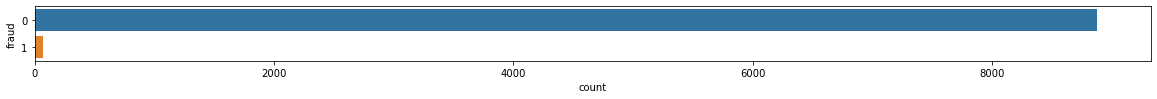

In [33]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='fraud', data=machine_df);
print(df.fraud.value_counts())


We have activated_date and last_payment_date, I want to use these values as separate months rather than days

In [34]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        8950 non-null   int64         
 1   cust_id                           8950 non-null   object        
 2   activated_date                    8937 non-null   datetime64[ns]
 3   last_payment_date                 8941 non-null   datetime64[ns]
 4   balance                           8948 non-null   float64       
 5   balance_frequency                 8950 non-null   float64       
 6   purchases                         8950 non-null   float64       
 7   oneoff_purchases                  8950 non-null   float64       
 8   installments_purchases            8950 non-null   float64       
 9   cash_advance                      8838 non-null   float64       
 10  purchases_frequency               8950 non-null 

So, first off I tried to change the last_payment date format from YYYY-MM-DD to only month and year

In [35]:
machine_df['last_payment_date'] = machine_df['last_payment_date'].dt.strftime('%Y-%m')
machine_df


,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-01,2020-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-01,2020-07,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-01,2020-09,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-01,2020-08,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-01,2020-10,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,C19186,2020-07-01,2020-11,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,8947,C19187,2020-07-01,2020-09,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
8947,8948,C19188,2020-07-01,2020-06,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,8949,C19189,2020-07-01,2020-07,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


Now, after changing the format, I want to change its type to categorical and hence assign a value to each month

In [36]:
machine_df['last_payment_date'] = machine_df['last_payment_date'].astype('category')
machine_df['activated_date'] = machine_df['activated_date'].astype('category')
machine_df

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-01,2020-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-01,2020-07,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-01,2020-09,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-01,2020-08,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-01,2020-10,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,C19186,2020-07-01,2020-11,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,8947,C19187,2020-07-01,2020-09,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
8947,8948,C19188,2020-07-01,2020-06,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,8949,C19189,2020-07-01,2020-07,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


So, once I have processed the data I want to make sure the type of data I'm dealing with

In [37]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Unnamed: 0                        8950 non-null   int64   
 1   cust_id                           8950 non-null   object  
 2   activated_date                    8937 non-null   category
 3   last_payment_date                 8941 non-null   category
 4   balance                           8948 non-null   float64 
 5   balance_frequency                 8950 non-null   float64 
 6   purchases                         8950 non-null   float64 
 7   oneoff_purchases                  8950 non-null   float64 
 8   installments_purchases            8950 non-null   float64 
 9   cash_advance                      8838 non-null   float64 
 10  purchases_frequency               8950 non-null   float64 
 11  oneoff_purchases_frequency        8950 non-null   float6

I was going to tale activated_date and last_payment_date as one and take their difference, but I rather did not


In [38]:
#import datetime as dt
#machine_df['time_duration'] = (pd.to_datetime(machine_df.last_payment_date) - pd.to_datetime(machine_df.activated_date)).dt.days
#machine_df = machine_df.drop('time_duration', 1)


In this step, I'm just assigning a number to each month and year to my two columns 

In [39]:
#assigning a number to year and month to activated_date and last_payment_date
machine_df["last_payment_date"] = machine_df["last_payment_date"].cat.codes
machine_df["activated_date"] =machine_df["activated_date"].cat.codes
machine_df

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,0,5,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,0,3,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,0,5,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,0,4,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,0,6,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,C19186,9,7,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,8947,C19187,9,5,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,0
8947,8948,C19188,9,2,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,8949,C19189,9,3,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


Now, this is a hard step that I want to repeat, since I'm dropping data with missing values! I'm going to make two data sets with one dropping the missing values and other one completely filling those missing values with the average. 

In [40]:
#now we are dropping those missing values since they would affect our data
machine_df_dropna= machine_df.dropna()
machine_df_dropna

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,0,5,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,0,3,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,0,5,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,5,C10005,0,6,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,6,C10006,0,3,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,...,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,8944,C19184,9,4,5.871712,0.500000,20.90,20.90,0.00,0.000000,...,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8945,8946,C19186,9,7,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8947,8948,C19188,9,2,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,8949,C19189,9,3,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [41]:
machine_df_dropna.corr()

,Unnamed: 0,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
Unnamed: 0,1.000000,0.991331,-0.012278,-0.236193,-0.102219,-0.140107,-0.135807,-0.081460,-0.081126,-0.019227,...,0.025983,-0.019548,-0.020241,-0.113409,-0.353416,-0.174745,-0.075330,0.043559,-0.177940,-0.068167
activated_date,0.991331,1.000000,-0.012000,-0.231303,-0.100227,-0.141856,-0.137030,-0.083379,-0.078454,-0.022371,...,0.023382,-0.016244,-0.017397,-0.113369,-0.350138,-0.172412,-0.073104,0.037407,-0.168833,-0.067577
last_payment_date,-0.012278,-0.012000,1.000000,0.001331,0.000294,0.006569,0.007349,0.002016,-0.009886,0.005921,...,0.001895,-0.007377,-0.006152,0.004742,0.018857,0.008566,-0.017224,0.010345,0.009178,-0.004284
balance,-0.236193,-0.231303,0.001331,1.000000,0.309189,0.176939,0.160445,0.123531,0.495920,-0.091052,...,-0.070656,0.444392,0.381431,0.149020,0.536215,0.324410,0.399734,-0.334070,0.066527,0.208435
balance_frequency,-0.102219,-0.100227,0.000294,0.309189,1.000000,0.121886,0.094763,0.114329,0.088133,0.226404,...,0.182565,0.179825,0.132260,0.182361,0.086464,0.038083,0.132319,-0.156396,0.104343,0.032516
purchases,-0.140107,-0.141856,0.006569,0.176939,0.121886,1.000000,0.918193,0.677850,-0.053460,0.391918,...,0.314467,-0.124485,-0.069691,0.686523,0.358128,0.607057,0.094721,0.175705,0.084143,0.524032
oneoff_purchases,-0.135807,-0.137030,0.007349,0.160445,0.094763,0.918193,1.000000,0.331193,-0.033236,0.264492,...,0.127355,-0.086479,-0.048401,0.545950,0.321501,0.572138,0.049527,0.130778,0.062906,0.483337
installments_purchases,-0.081460,-0.083379,0.002016,0.123531,0.114329,0.677850,0.331193,1.000000,-0.065763,0.442634,...,0.512672,-0.136103,-0.076260,0.622062,0.256284,0.384125,0.133589,0.175825,0.083666,0.351105
cash_advance,-0.081126,-0.078454,-0.009886,0.495920,0.088133,-0.053460,-0.033236,-0.065763,1.000000,-0.219970,...,-0.179085,0.629560,0.655988,-0.077688,0.304177,0.459072,0.141649,-0.158968,-0.073135,0.204236
purchases_frequency,-0.019227,-0.022371,0.005921,-0.091052,0.226404,0.391918,0.264492,0.442634,-0.219970,1.000000,...,0.862056,-0.317813,-0.209205,0.567144,0.119451,0.099850,0.001890,0.306552,0.052325,0.072323


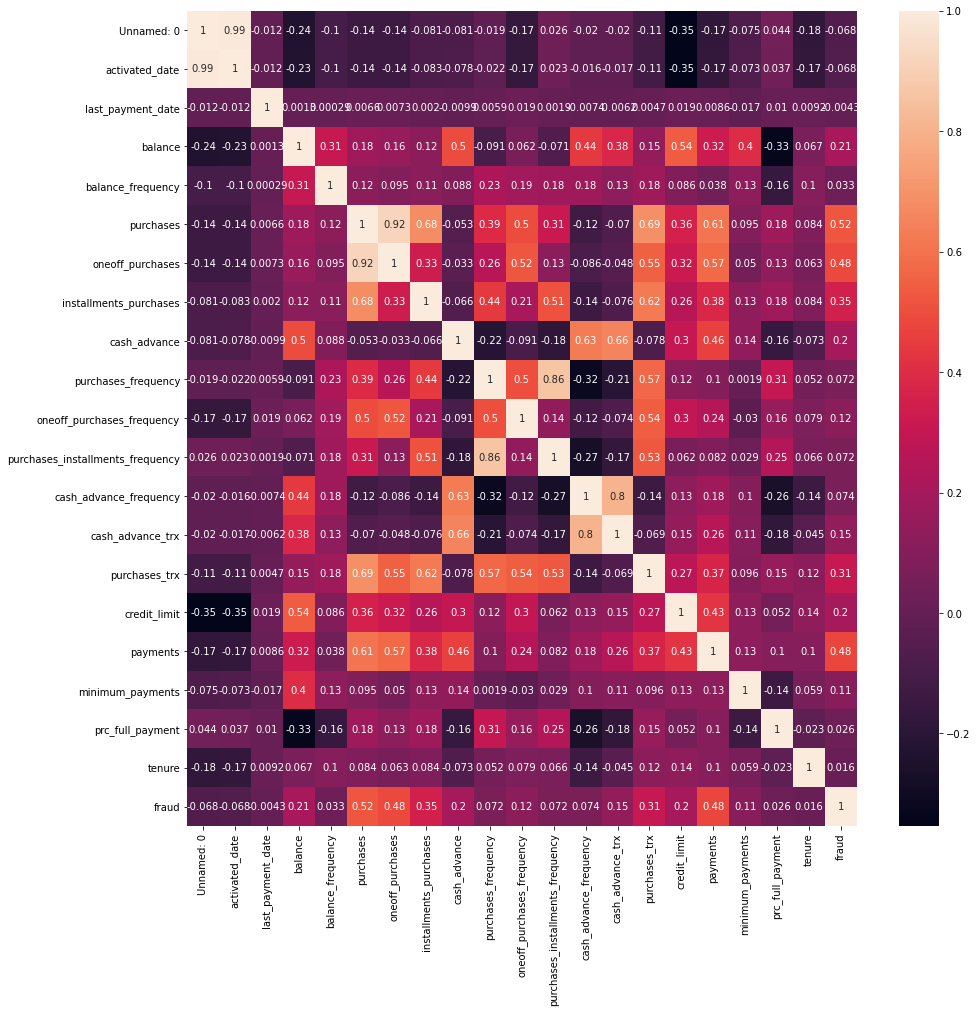

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(machine_df_dropna.corr(), annot=True)
plt.show()

In this step, I'm importing a library for my linear regression

In [43]:
#importing ML libraries that would help to build our predictive model, in this case only linear regression
from sklearn.model_selection import train_test_split

Here is where I want to isolate my dependent variable from the rest of the columns

In [44]:
#Getting the names of all the columns, so we can only copy-paste all but the fraud column
machine_df_dropna.columns

Index(['Unnamed: 0', 'cust_id', 'activated_date', 'last_payment_date',
       'balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'],
      dtype='object')

In [45]:
y = machine_df_dropna[['fraud']]
y

,fraud
0,0
1,0
2,0
4,0
5,0
...,...
8943,0
8945,0
8947,0
8948,0


In [46]:
#the rest of our variables would be our "x-values"
x= machine_df_dropna[['activated_date','last_payment_date',
       'balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure']]
x

,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,0,5,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,0,3,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,0,5,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,0,6,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,0,3,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,9,4,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,9,7,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,9,2,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,9,3,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [76]:
#Splitting our data between training set and test set to get a more accurate prediction
#in this example we are going to use a train size of 80% of the data vs a test_size of 20%
X_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.667, test_size=0.333, random_state=6)


In [77]:
#looking in the shapes of our data to give us an idea 
print(X_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)


(5680, 19)
(2837, 19)
(5680, 1)
(2837, 1)


# Predictors and target


for this segment we are going to define our "target" and predictors variables.

In [78]:
target='fraud'
predictors=['balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']

In [79]:
trainD, testD=train_test_split(machine_df_dropna, test_size=0.333, random_state=2018, shuffle=True)
trainD, validD=train_test_split(machine_df_dropna, test_size=0.333, random_state=2018, shuffle=True)

In [94]:
clf=RandomForestClassifier(n_jobs=4, random_state=2018, criterion='entropy', n_estimators=100, verbose=False)

In [95]:
clf.fit(trainD[predictors], trainD[target].values)

RandomForestClassifier(criterion='entropy', n_jobs=4, random_state=2018,
                       verbose=False)

In [96]:
preds=clf.predict(validD[predictors])

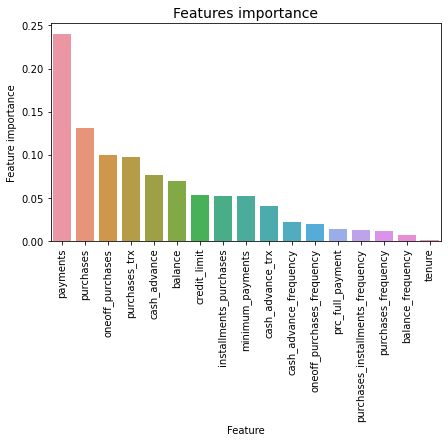

In [97]:
tmp=pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp=tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize=(7, 4))
plt.title('Features importance',fontsize=14)
s=sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

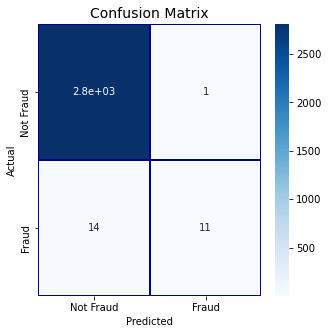

In [98]:
cm = pd.crosstab(validD[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


This classifier works with an accuracy of 0.741. Here the main variables involved are purchases, oneoff_purchases, payments, cash_advance and installments_purchases.

Fianlly, the Confussion Matrix shows how this prediction works accurately to predict the "Not Fraud" events because we have an excess of those values of the Data frame, the prediction doesn't have false negatives values but it has a considerable amount of false positive values.

# Using Linear Regression to calculate which variable affect the most

In [85]:
#so now that we have our train and test data, we are going to perform our linear regression
#importing the sklearn library
from sklearn.linear_model import LinearRegression

In [86]:
#creating a liner regression model
mlr = LinearRegression()
 
mlr.fit(X_train, y_train) 

LinearRegression()

In [87]:
y_predict = mlr.predict(x_test)
print(y_predict)

[[-0.0144701 ]
 [-0.00771164]
 [ 0.00289062]
 ...
 [ 0.01744832]
 [-0.00318773]
 [-0.00256053]]


In [88]:
mlr.score(x_test,y_test)


0.3447292006344761

In [89]:
coefficients = mlr.coef_.tolist()
coefficients
columnss = x.columns
columnss

Index(['activated_date', 'last_payment_date', 'balance', 'balance_frequency',
       'purchases', 'oneoff_purchases', 'installments_purchases',
       'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

Here I tried to use a simple "list(zip(columns, coefficients))" to join easily my values. First time It was running good, then it mismatched my indexes until I just do it for hand.

In [90]:
df_coeff = {'Variable' : ['activated_date', 'last_payment_date', 'balance', 'balance_frequency',
       'purchases', 'oneoff_purchases', 'installments_purchases',
       'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],  
             'Coefficient' :[0.00021742829365622407,
  -5.269544637512853e-06,
  9.66967161084579e-07,
  -0.007046007913030827,
  0.00013466945774863215,
  -0.00011115586958264083,
  -0.00010988780314459141,
  6.461420754568113e-06,
  0.025056311897431082,
  -0.06322339926439527,
  -0.041115737912047125,
  -0.04535755666389504,
  0.001542718039570227,
  0.0001757217697034752,
  -1.3993234383233796e-06,
  3.460073694980928e-06,
  -1.9981658070070195e-07,
  -0.004553928048703531,
  -0.0011895025733827714] }

In [91]:
df_coeffs = pd.DataFrame(df_coeff)
df_coeffs

,Variable,Coefficient
0,activated_date,2.174283e-04
1,last_payment_date,-5.269545e-06
2,balance,9.669672e-07
3,balance_frequency,-7.046008e-03
4,purchases,1.346695e-04
5,oneoff_purchases,-1.111559e-04
6,installments_purchases,-1.098878e-04
7,cash_advance,6.461421e-06
8,purchases_frequency,2.505631e-02
9,oneoff_purchases_frequency,-6.322340e-02


In [92]:
df_sorted = df_coeffs.sort_values(by ="Coefficient")
df_sorted


,Variable,Coefficient
9,oneoff_purchases_frequency,-6.322340e-02
11,cash_advance_frequency,-4.535756e-02
10,purchases_installments_frequency,-4.111574e-02
3,balance_frequency,-7.046008e-03
17,prc_full_payment,-4.553928e-03
18,tenure,-1.189503e-03
5,oneoff_purchases,-1.111559e-04
6,installments_purchases,-1.098878e-04
1,last_payment_date,-5.269545e-06
14,credit_limit,-1.399323e-06


/Users/misaeljara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(-0.08, 0, ''),
 Text(-0.06, 0, ''),
 Text(-0.04, 0, ''),
 Text(-0.020000000000000004, 0, ''),
 Text(0.0, 0, ''),
 Text(0.020000000000000004, 0, ''),
 Text(0.039999999999999994, 0, '')]

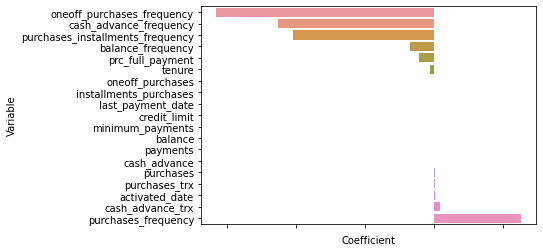

In [93]:
ax = sns.barplot(x="Coefficient", y="Variable", data = df_sorted)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)